# Purpose

This notebook is to test whether the `neuro_op` module's nodes can successfully infer `world_dist` if only this distribution's information pieces $x_{world}$ are received (i.e., with rates h>0, r=0).

For this, the model is run with nodes receiving different amount of information (i.e., different `t_max`, `h`). Then, each node's posterior predictive distribution (*PPD*), equalling its forecast of future incoming information, is obtained via 
1. sampling of model parameters $\theta$ proportional to its posterior $p(\theta | x_{world})$;
2. using these sampled model parameters to generate data proportional to the model likelihood $p(x_{PPD}|\theta_{sampled})$

PPDs thereby fully conserves uncertainty by paying respect to both posterior and likelihood stochasticity.

We then use the PPDs to quantify the nodes' modelling accuracy by computing the Kullback-Leibler divergence and average MLE distances between node PPDs and data generated by `world_dist`.

In [2]:
import neuro_op as nop
import matplotlib.pyplot as plt
# import networkx as nx
import numpy as np
import scipy.stats as st

In [3]:
input_dict = dict(
    N_nodes=100,
    N_neighbours=3,
    N_beliefs=500,
    belief_min=-50,
    belief_max=50,
    log_priors=np.zeros(500),
    likelihood=st.norm(loc=0, scale=5),
    world_dist=st.norm(loc=0, scale=5),
    h=1,
    r=1,
    t0=0,
    t_max=10000,
    t_sample=250,
    sample_bins=50,
    sample_opinion_range=[-20, 20],
)

output_variables = [
    "nodes",
    "G",
    "beliefs",
    "world",
    "N_events",
    "t_end",
    "kl_divs_means",
    "t_sample",
    "RANDOM_SEED",
]

In [4]:
output1 = dict(zip(
    output_variables,
    nop.run_model(**input_dict)
))

print(f"Number of events: {output1['N_events']}")

Sampling at t= 0
Sampling at t= 250.775530129959


/home/jfriedel/Documents/Repos/neuro_op/src/neuro_op/neuro_op.py:221: RuntimeWarning: invalid value encountered in divide
  ppd_world_out = ppd_world_out[0] / np.sum(
/home/jfriedel/Documents/Repos/neuro_op/src/neuro_op/neuro_op.py:135: RuntimeWarning: divide by zero encountered in log
  terms = P * np.log(P / Q)
/home/jfriedel/Documents/Repos/neuro_op/src/neuro_op/neuro_op.py:135: RuntimeWarning: invalid value encountered in multiply
  terms = P * np.log(P / Q)


Sampling at t= 501.22674125572956
Sampling at t= 750.2150819313106
Sampling at t= 1001.0434005360537
Sampling at t= 1250.2528259464898
Sampling at t= 1500.3430480979805
Sampling at t= 1750.0462394943597
Sampling at t= 2002.0048104993225
Sampling at t= 2250.3698590923877
Sampling at t= 2500.129164240224
Sampling at t= 2751.1471113061702
Sampling at t= 3000.1025311366634
Sampling at t= 3250.129668262412
Sampling at t= 3500.5560553442947
Sampling at t= 3750.0559317376533
Sampling at t= 4000.224639408201
Sampling at t= 4250.574140174171
Sampling at t= 4500.150982614853
Sampling at t= 4750.139727507397
Sampling at t= 5000.738036669706
Sampling at t= 5250.290840865571
Sampling at t= 5500.996290766407
Sampling at t= 5750.174578350577
Sampling at t= 6000.37137579951
Sampling at t= 6250.89674796538
Sampling at t= 6500.56002182455
Sampling at t= 6750.728936551029
Sampling at t= 7000.002495368128
Sampling at t= 7251.293656540286
Sampling at t= 7501.4952655694715
Sampling at t= 7751.122925275497
S

In [5]:
input2_dict = input_dict.copy()
input2_dict["h"] = 0.1
input2_dict["r"] = 5
output2 = dict(zip(
    output_variables,
    nop.run_model(**input2_dict)
))
print(f"Number of events: {output2['N_events']}")

Sampling at t= 0
Sampling at t= 250.0406922080948
Sampling at t= 500.0803703329209
Sampling at t= 750.1471559824004
Sampling at t= 1000.3572270417261
Sampling at t= 1250.0682036436667
Sampling at t= 1500.0389603113583
Sampling at t= 1750.104030568702
Sampling at t= 2000.0320353000116
Sampling at t= 2250.1361576285544
Sampling at t= 2500.327114791559
Sampling at t= 2750.181399803989
Sampling at t= 3000.421330123888
Sampling at t= 3250.301635702756
Sampling at t= 3500.3249878570537
Sampling at t= 3750.0781720048
Sampling at t= 4000.019330632438
Sampling at t= 4250.048510430776
Sampling at t= 4500.299136982721
Sampling at t= 4750.262296334118
Sampling at t= 5000.052758830762
Sampling at t= 5250.265704309871
Sampling at t= 5500.726209224371
Sampling at t= 5750.351830815578
Sampling at t= 6000.126562542279
Sampling at t= 6250.066023397078
Sampling at t= 6500.084429986939
Sampling at t= 6750.298747357825
Sampling at t= 7000.1963761733305
Sampling at t= 7250.083943960417
Sampling at t= 7500.1

## Data analysis

After simulating the network with $h=1, r=0$ (meaning nodes communicating with the central node only), some simple analysis steps follow.



In [6]:
# For improving of readability, increase all font sizes of plots. Also, set legend location to upper right.
plt.rcParams.update(
    {
        "font.size": 20,
        "legend.loc": "upper right",
    }
)

#### Data analysis 1

Firstly, extract output values for further analysis:

In [7]:
 for key, value in output2.items():
    globals()[key] = value


Each node's posteriors are plotted. One should see nodes' posteriors of model parameters (in this case, $\mu$), to converge around the true value. If not, nodes may need more information to converge ($\rightarrow$ increase $t_{max}, h$).


Text(0, 0.5, '$p(\\mu|x_i)$')

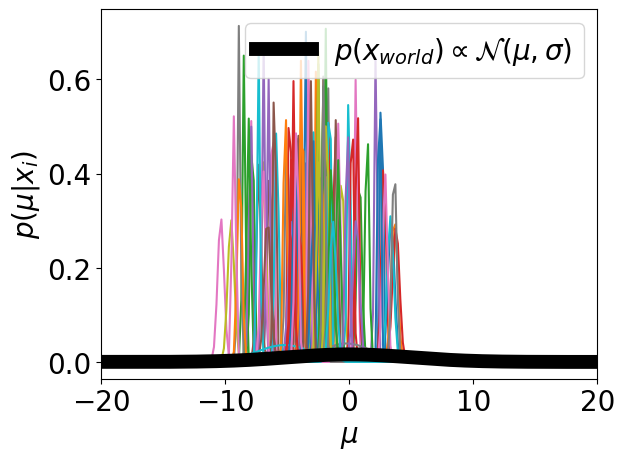

In [8]:
for i in range(len(nodes)):
    plt.plot(nodes[0].beliefs, nop.logpdf_to_pdf(nodes[i].log_probs))
    plt.xlim([-20, 20])
plt.plot(
    beliefs,
    nop.logpdf_to_pdf(world.log_probs),
    color="black",
    linewidth=10,
    label="$p(x_{world}) \propto \mathcal{N}(\mu,\sigma)$",
)
plt.legend()
plt.xlabel("$\mu$")
plt.ylabel("$p(\mu|x_i)$")

#### Data analysis 2

Each node executes posterior predictive distribution sampling to generate a forecast of expected future data.

For some eye-balling analysis, histograms of `world_dist`'s and some nodes' PPD samples are plotted.

In [9]:
# Define parameters of data analysis
N_bins = 50  # go for uneven bin number to have a bin centered on 0
opinion_range = [-20, 20]  # chosen by experience, no formal reasoning

# Generate posterior predictive distributions (PPDs) for each node by generating ppd samples and binning them into histograms
ppd_samples = [
    nop.ppd_Gaussian_mu(node.beliefs, node.log_probs, 10000) for node in nodes
    ]
ppds = [  # PPD stored as histograms. Each histogram is a tuple (counts, bin_edges).
    np.histogram(
        i,
        bins=N_bins,
        range=opinion_range,
    )
    for i in ppd_samples
]

ppd_world = np.histogram(
    world.diary_out,
    bins=N_bins,
    range=opinion_range,
)

world_binned = nop.dist_binning(world.likelihood, N_bins, opinion_range)

# Save the centre of each node's bin with most samples.
# We then assume 'centres of each node's bin with most samples' == 'maximum likelihood estimates (MLEs) of each node')
argmax = np.argmax(ppd_world[0])
mu_world = (ppd_world[1][argmax] + ppd_world[1][argmax + 1]) / 2

argmax = [np.argmax(ppds_hist[0]) for ppds_hist in ppds]
mu_nodes = [
    (hist_data[1][i] + hist_data[1][i + 1]) / 2 for hist_data, i in zip(ppds, argmax)
]

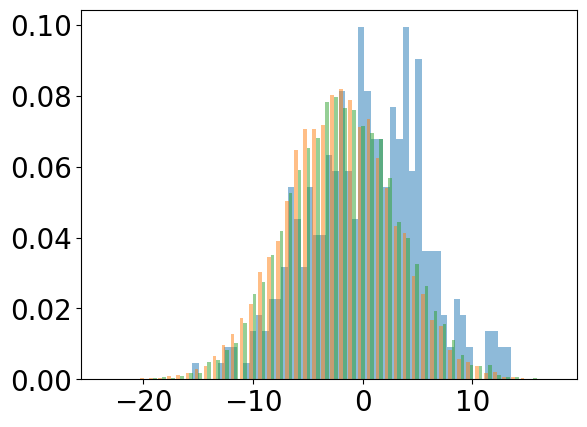

In [10]:
for i in [world.diary_out, ppd_samples[:2]]:
    plt.hist(i, bins=N_bins, density=True, alpha=1/2)

In [16]:
a = [[1,2],[3,4]]
for i in a:
    print(i)

[1, 2]
[3, 4]


Mean KL divergence:	 0.3907556886569204
Mean linear p-distance:	 7.992000000000001
Mean quad. p-distance:	 75.488


(array([33., 16., 13.,  6.,  8.,  3.,  1.,  2.,  3.,  3.,  2.,  1.,  3.,
         1.,  1.,  1.,  1.,  1.,  0.,  1.]),
 array([0.00241321, 0.10358237, 0.20475153, 0.30592069, 0.40708985,
        0.50825901, 0.60942817, 0.71059733, 0.81176649, 0.91293565,
        1.01410481, 1.11527397, 1.21644313, 1.31761229, 1.41878145,
        1.51995061, 1.62111977, 1.72228893, 1.82345809, 1.92462725,
        2.02579641]),
 <BarContainer object of 20 artists>)

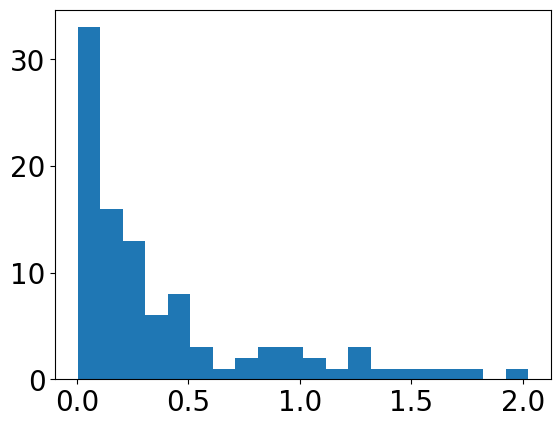

In [11]:
kl_divs = []
for i in ppds:
    P_sampled = i[0] / np.sum(i[0])
    kl_divs.append(nop.kl_divergence(P_sampled, world_binned))

print(f"Mean KL divergence:\t {np.mean(kl_divs)}")
print(f"Mean linear p-distance:\t {nop.p_distances(mu_nodes, mu_world, p=1)/len(nodes)}")
print(f"Mean quad. p-distance:\t {nop.p_distances(mu_nodes, mu_world, p=2)/len(nodes)}")
plt.hist(kl_divs, bins=20)


[array([       nan, 1.57917448]), array([18.29199426,  1.10640152]), array([14.00551003,  0.91835266]), array([12.60236337,  0.82092983]), array([10.27529456,  0.77621881]), array([9.37443346, 0.73411055]), array([8.43768255, 0.69972362]), array([7.99600233, 0.66987989]), array([6.68626955, 0.65859791]), array([5.62303779, 0.63727611]), array([5.52599239, 0.62200228]), array([4.92495211, 0.6056536 ]), array([4.91274018, 0.60323009]), array([3.8619976 , 0.57228187]), array([3.77297689, 0.55053755]), array([3.73842927, 0.54879567]), array([3.75016388, 0.5485636 ]), array([3.58645079, 0.53176338]), array([3.56185   , 0.52715698]), array([3.52687071, 0.52422223]), array([3.45837547, 0.52175506]), array([3.39299011, 0.51773621]), array([3.10468787, 0.51504749]), array([3.02884785, 0.50886189]), array([2.99727156, 0.50571766]), array([3.01751055, 0.49943898]), array([2.98179311, 0.4946271 ]), array([2.99597418, 0.49563583]), array([2.86394622, 0.47768678]), array([2.76028593, 0.46461593]), a

Text(0, 0.5, '$KLD(P(t),Q(t))$')

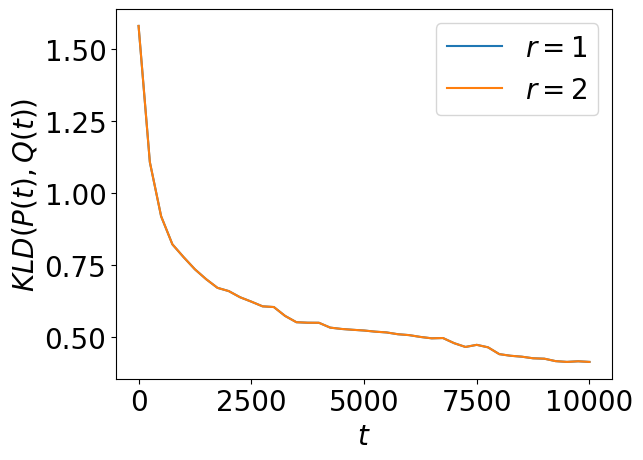

In [12]:
kld_1 = np.array(kl_divs_means)[:,1]
kld_2 = np.array(output2["kl_divs_means"])[:,1]
print(kl_divs_means)

plt.plot(range(0, int(t_end+1), t_sample), kld_1,
    label="$r=1$"
)
plt.plot(range(0, int(t_end+1), t_sample), kld_2,
    label="$r=2$"
)
plt.legend()
plt.xlabel("$t$")
plt.ylabel("$KLD(P(t),Q(t))$")